In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import numpy as np
from matplotlib import pyplot as plt

import os
from PIL import Image

from skimage.util.shape import view_as_blocks

In [2]:
# img is a numpy array with shape (16, 16, 15, 26, 3)
def print_patches(img):
    n_images = 16
    f, axarr = plt.subplots(16, n_images,figsize=(10, 10), sharey=True)

    for i in range(16):
        for j in range (16):
            axarr[i, j].imshow(img[i][j])

    plt.show()

# x = x.reshape(16, 16, 15, 26, 3)
# print_patches(x)

In [3]:
# block (16, 16, 15, 26, 3) is a numpy array stores 16 x 16 patches of 15 x 26 frame
# merge_block returns a 240 x 416 image
def merge_block(block):
    image_shape = (block.shape[0]*block.shape[2], block.shape[1]*block.shape[3], block.shape[4])
    img = np.empty(image_shape, dtype = np.int32)

    for i in range(16):
        for j in range(15):
            img[i*15 + j] = block[i][:,j].reshape((1, image_shape[1], 3))
            
    return img

In [4]:
# patch_shape = (15, 26, 3)
# return (76800, 15, 26, 3) patch_data; 76800 patches
def load_data(data_path, patch_shape):
    file_names = os.listdir(data_path)
    n_image = len(file_names)

#     image_shape = (240, 416, 3)
    input_im = np.array(Image.open(data1_path + '/' + file_names[0]))
    image_shape = input_im[...,:3].shape

    block_shape = (image_shape[0]//patch_shape[0], image_shape[1]//patch_shape[1])

    n_patch = block_shape[0] * block_shape[1]

    patch_data = np.empty((n_patch * n_image, patch_shape[0], patch_shape[1], patch_shape[2]), dtype = np.int32)

    for i in range(n_image):  
        input_im =  np.array(Image.open(data1_path + '/' + file_names[i]))
        block = view_as_blocks(input_im[...,:3], block_shape = patch_shape).reshape \
            ((n_patch, patch_shape[0], patch_shape[1], patch_shape[2]))
    #     print(block.shape)

        for j in range(n_patch):
            patch_data[i*n_patch + j] = block[j]

    print(patch_data.shape)
    return patch_data

In [5]:
# The image is actually 240 x 416, 
#     so we will have 16 x 16 patches with frame shape of 15 x 26 instead of 26 x 15
data1_path = 'RaceHorses_416x240_30'
patch_shape = (15, 26, 3)

patch_data = load_data(data1_path, patch_shape)

(76800, 15, 26, 3)


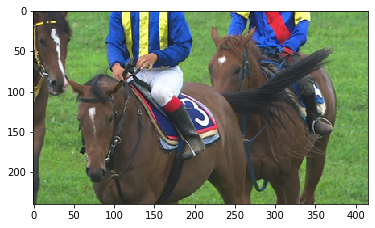

In [6]:
test_block = patch_data.reshape(300, 256, 15, 26, 3)[100]
block = test_block.reshape(16, 16, 15, 26, 3)

test_image = merge_block(block)

img = plt.imshow(test_image)
plt.show()